In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [1]:
!pip install pandas_ta
!pip install backtesting
# устанавливаем все нужные библиотеки

In [4]:
df = pd.read_csv('quotes_imoextr.csv', encoding='windows-1251', sep=';')

In [5]:
df

,ID,NAME,TRADEDATE,OPEN,HIGH,LOW,CLOSE,VALUE,DURATION,YIELD
0,MCFTR,Индекс МосБиржи полной доходности «брутто»,2012-01-03,1628.12,1628.12,1628.12,1628.12,0.000000e+00,NaN,NaN
1,MCFTR,Индекс МосБиржи полной доходности «брутто»,2012-01-04,1631.31,1631.31,1631.31,1631.31,0.000000e+00,NaN,NaN
2,MCFTR,Индекс МосБиржи полной доходности «брутто»,2012-01-05,1617.02,1617.02,1617.02,1617.02,0.000000e+00,NaN,NaN
3,MCFTR,Индекс МосБиржи полной доходности «брутто»,2012-01-06,1623.43,1623.43,1623.43,1623.43,0.000000e+00,NaN,NaN
4,MCFTR,Индекс МосБиржи полной доходности «брутто»,2012-01-09,1632.18,1632.18,1632.18,1632.18,0.000000e+00,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2752,MCFTR,Индекс МосБиржи полной доходности «брутто»,2022-12-30,4548.82,4548.82,4548.82,4548.82,1.666494e+10,0.0,0.0
2753,MCFTR,Индекс МосБиржи полной доходности «брутто»,2023-01-03,4588.01,4588.01,4588.01,4588.01,1.269031e+10,0.0,0.0
2754,MCFTR,Индекс МосБиржи полной доходности «брутто»,2023-01-04,4579.01,4579.01,4579.01,4579.01,1.151004e+10,0.0,0.0
2755,MCFTR,Индекс МосБиржи полной доходности «брутто»,2023-01-05,4554.20,4554.20,4554.20,4554.20,9.783315e+09,0.0,0.0


In [6]:
df.drop(['ID', 'VALUE', 'NAME', 'DURATION', 'YIELD',], axis = 1, inplace= True)

In [7]:
df.TRADEDATE = pd.to_datetime(df.TRADEDATE)

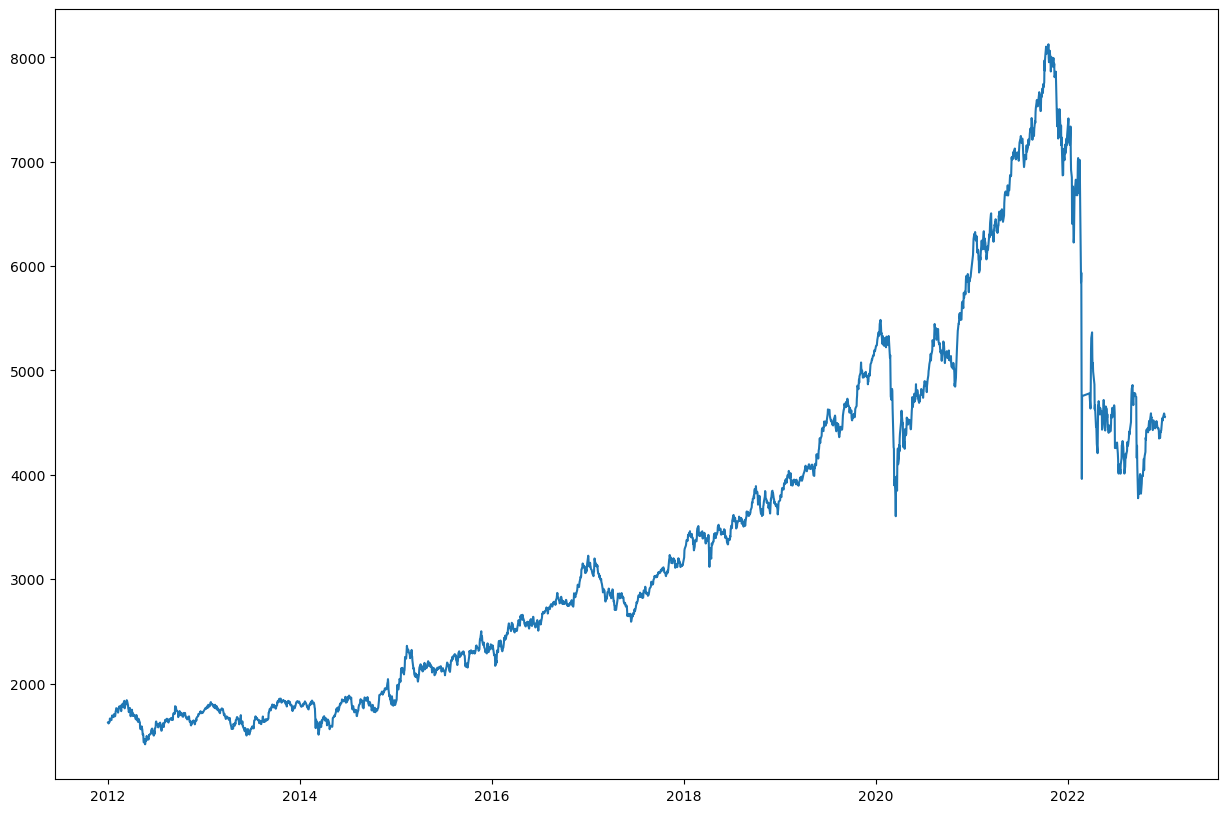

In [8]:
y = df.CLOSE
x = df.TRADEDATE
plt.figure(figsize=(15, 10))
plt.plot(x, y);
# plt.plot(x, df.MA_50, color='r');
# plt.plot(x, df.MA_200, color='g');
# смотрим график индекса

In [9]:
df

,TRADEDATE,OPEN,HIGH,LOW,CLOSE
0,2012-01-03,1628.12,1628.12,1628.12,1628.12
1,2012-01-04,1631.31,1631.31,1631.31,1631.31
2,2012-01-05,1617.02,1617.02,1617.02,1617.02
3,2012-01-06,1623.43,1623.43,1623.43,1623.43
4,2012-01-09,1632.18,1632.18,1632.18,1632.18
...,...,...,...,...,...
2752,2022-12-30,4548.82,4548.82,4548.82,4548.82
2753,2023-01-03,4588.01,4588.01,4588.01,4588.01
2754,2023-01-04,4579.01,4579.01,4579.01,4579.01
2755,2023-01-05,4554.20,4554.20,4554.20,4554.20


In [10]:
df.rename(columns = {'OPEN': 'Open', 'HIGH': 'High', 'LOW': 'Low', 'CLOSE': 'Close'}, inplace=True)

In [11]:
df.Open = df.Close
df.High = df.Close
df.Low = df.Close

In [12]:
df

,TRADEDATE,Open,High,Low,Close
0,2012-01-03,1628.12,1628.12,1628.12,1628.12
1,2012-01-04,1631.31,1631.31,1631.31,1631.31
2,2012-01-05,1617.02,1617.02,1617.02,1617.02
3,2012-01-06,1623.43,1623.43,1623.43,1623.43
4,2012-01-09,1632.18,1632.18,1632.18,1632.18
...,...,...,...,...,...
2752,2022-12-30,4548.82,4548.82,4548.82,4548.82
2753,2023-01-03,4588.01,4588.01,4588.01,4588.01
2754,2023-01-04,4579.01,4579.01,4579.01,4579.01
2755,2023-01-05,4554.20,4554.20,4554.20,4554.20


In [13]:
df.set_index('TRADEDATE', inplace=True)

In [14]:
df.Low.min()

1417.64

In [15]:
df2 = df.loc[f'2012-01-10' : f'2018-01-10']
# на всякий случай

## backtesting

In [30]:
import pandas_ta as ta
from backtesting import Backtest, Strategy
from backtesting.lib import crossover
from backtesting.test import SMA, GOOG

def macd(close):
    return ta.macd(close, 12, 26, 9).MACDh_12_26_9


class SmaCross(Strategy):
    n1 = 50
    n2 = 200

    def init(self):
        close = self.data.Close
        self.sma50 = self.I(ta.sma, pd.Series(self.data.Close), self.n1)
        self.sma200 = self.I(ta.sma, pd.Series(self.data.Close), self.n2)
        self.macd = self.I(lambda *args: macd(*args), pd.Series(self.data.Close))



    def next(self):
        if not self.position and self.data.Close > self.sma50 and self.macd > 5 and self.sma50 > self.sma200:
            self.buy()
        elif self.position and self.sma50 >= self.data.Close or self.sma50 <= self.sma200:
            self.position.close()



bt = Backtest(df, SmaCross,
              cash=100000, commission=.0005,)

output = bt.run()
output

Start                     2012-01-03 00:00:00
End                       2023-01-06 00:00:00
Duration                   4021 days 00:00:00
Exposure Time [%]                    42.94523
Equity Final [$]                 161513.82732
Equity Peak [$]                 168258.959995
Return [%]                          61.513827
Buy & Hold Return [%]              179.685158
Return (Ann.) [%]                    4.479513
Volatility (Ann.) [%]                9.626998
Sharpe Ratio                         0.465307
Sortino Ratio                        0.714207
Calmar Ratio                         0.199559
Max. Drawdown [%]                  -22.447003
Avg. Drawdown [%]                   -2.385958
Max. Drawdown Duration     1769 days 00:00:00
Avg. Drawdown Duration       88 days 00:00:00
# Trades                                   37
Win Rate [%]                        45.945946
Best Trade [%]                       17.62473
Worst Trade [%]                     -4.113302
Avg. Trade [%]                    

In [31]:
bt.plot()

Row(id='2971', ...)

# Анализ результатов бектеста

In [18]:
output

Start                     2012-01-03 00:00:00
End                       2023-01-06 00:00:00
Duration                   4021 days 00:00:00
Exposure Time [%]                    42.94523
Equity Final [$]                 161513.82732
Equity Peak [$]                 168258.959995
Return [%]                          61.513827
Buy & Hold Return [%]              179.685158
Return (Ann.) [%]                    4.479513
Volatility (Ann.) [%]                9.626998
Sharpe Ratio                         0.465307
Sortino Ratio                        0.714207
Calmar Ratio                         0.199559
Max. Drawdown [%]                  -22.447003
Avg. Drawdown [%]                   -2.385958
Max. Drawdown Duration     1769 days 00:00:00
Avg. Drawdown Duration       88 days 00:00:00
# Trades                                   37
Win Rate [%]                        45.945946
Best Trade [%]                       17.62473
Worst Trade [%]                     -4.113302
Avg. Trade [%]                    

In [19]:
output._trades[output._trades.ReturnPct < -0.02]

,Size,EntryBar,ExitBar,EntryPrice,ExitPrice,PnL,ReturnPct,EntryTime,ExitTime,Duration
2,58,498,506,1819.709400,1776.99,-2477.725200,-0.023476,2013-12-20,2014-01-08,19 days
3,56,535,542,1833.426255,1767.60,-3686.270280,-0.035903,2014-02-18,2014-02-27,9 days
4,55,660,668,1820.269680,1772.68,-2617.432400,-0.026144,2014-08-19,2014-08-29,10 days
5,52,674,685,1854.826950,1809.31,-2366.881400,-0.024540,2014-09-08,2014-09-23,15 days
10,45,838,846,2170.204560,2105.97,-2890.555200,-0.029598,2015-05-07,2015-05-20,13 days
11,43,886,893,2201.890395,2111.32,-3894.526985,-0.041133,2015-07-16,2015-07-27,11 days
14,38,1021,1030,2391.515160,2334.88,-2152.136080,-0.023682,2016-01-28,2016-02-10,13 days
16,36,1112,1115,2618.288490,2563.47,-1973.465640,-0.020937,2016-06-09,2016-06-15,6 days
19,32,1471,1493,3202.570485,3117.59,-2719.375520,-0.026535,2017-11-08,2017-12-08,30 days
24,27,1724,1729,3846.202140,3739.34,-2885.277780,-0.027784,2018-11-07,2018-11-14,7 days


In [20]:
df.iloc[846]

Open     2105.97
High     2105.97
Low      2105.97
Close    2105.97
Name: 2015-05-20 00:00:00, dtype: float64

In [21]:
ta.sma(df.Close, 50).iloc[846]

2136.7646

In [36]:
import pandas_ta as ta
from backtesting import Backtest, Strategy
from backtesting.lib import crossover
from backtesting.test import SMA, GOOG


class SmaCross(Strategy):
    n1 = 50
    n2 = 200

    def init(self):
        close = self.data.Close
        self.sma50 = self.I(ta.sma, pd.Series(self.data.Close), self.n1)
        self.sma200 = self.I(ta.sma, pd.Series(self.data.Close), self.n2)



    def next(self):
        if not self.position and self.data.Close > self.sma50 and self.sma50 > self.sma200:
            self.buy()
        elif self.position and self.sma50 <= self.sma200:
            self.position.close()



bt2 = Backtest(df, SmaCross,
              cash=100000, commission=.0005,)

output2 = bt2.run()
output2

Start                     2012-01-03 00:00:00
End                       2023-01-06 00:00:00
Duration                   4021 days 00:00:00
Exposure Time [%]                    72.03482
Equity Final [$]                230157.383355
Equity Peak [$]                 301828.908605
Return [%]                         130.157383
Buy & Hold Return [%]              179.685158
Return (Ann.) [%]                    7.917137
Volatility (Ann.) [%]               17.027402
Sharpe Ratio                         0.464964
Sortino Ratio                         0.69928
Calmar Ratio                         0.232522
Max. Drawdown [%]                  -34.049038
Avg. Drawdown [%]                   -2.967864
Max. Drawdown Duration      744 days 00:00:00
Avg. Drawdown Duration       43 days 00:00:00
# Trades                                    6
Win Rate [%]                             50.0
Best Trade [%]                      47.715158
Worst Trade [%]                     -7.099546
Avg. Trade [%]                    

In [37]:
bt2.plot()

Row(id='4924', ...)